**IMPORTING LIBRARIES**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

**LOADING DATA**

In [ ]:
data = pd.read_csv('heart_disease_uci.csv')

In [ ]:
data.shape

(920, 16)

In [ ]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**DATA VISUALIZATION and EXPLORATORY ANALYSIS**

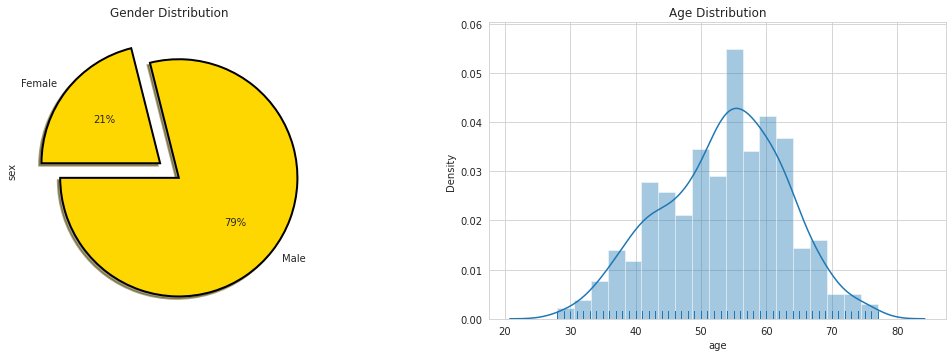

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
data['sex'].value_counts().plot.pie(autopct = '%1.0f%%', colors = sns.color_palette('prism',1), startangle = 900, labels =['Male','Female'], wedgeprops = {'linewidth':2, 'edgecolor':'k'}, explode = [.1,.1], shadow = True)
plt.title('Gender Distribution')
plt.subplot(222)
ax = sns.distplot(data['age'], rug = True)
plt.title('Age Distribution')
plt.show()

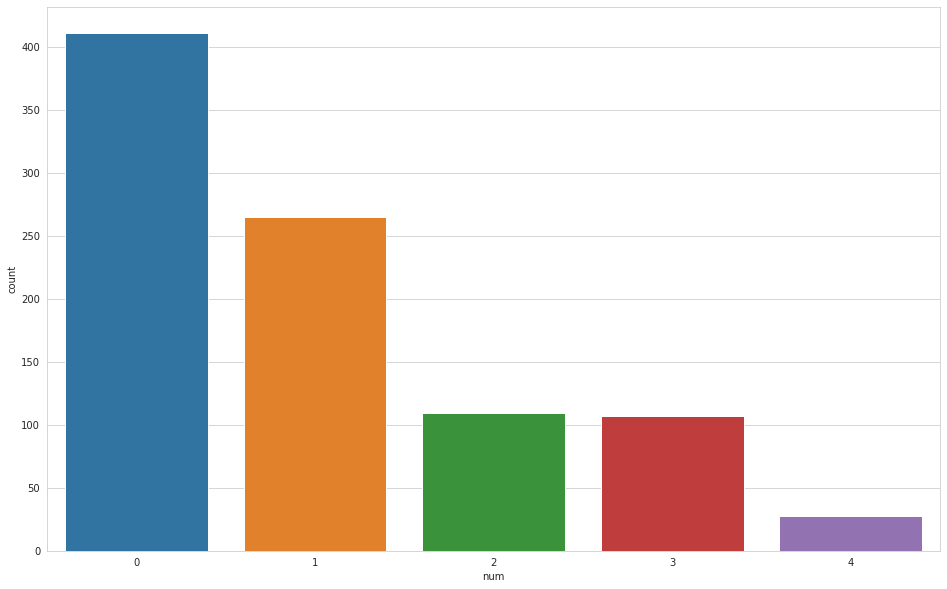

In [ ]:
#plotting target variable to see whether or not the data is balanced
plt.figure(figsize=(16,10))
sns.countplot('num', data=data)
plt.show()

<Figure size 1440x2160 with 0 Axes>

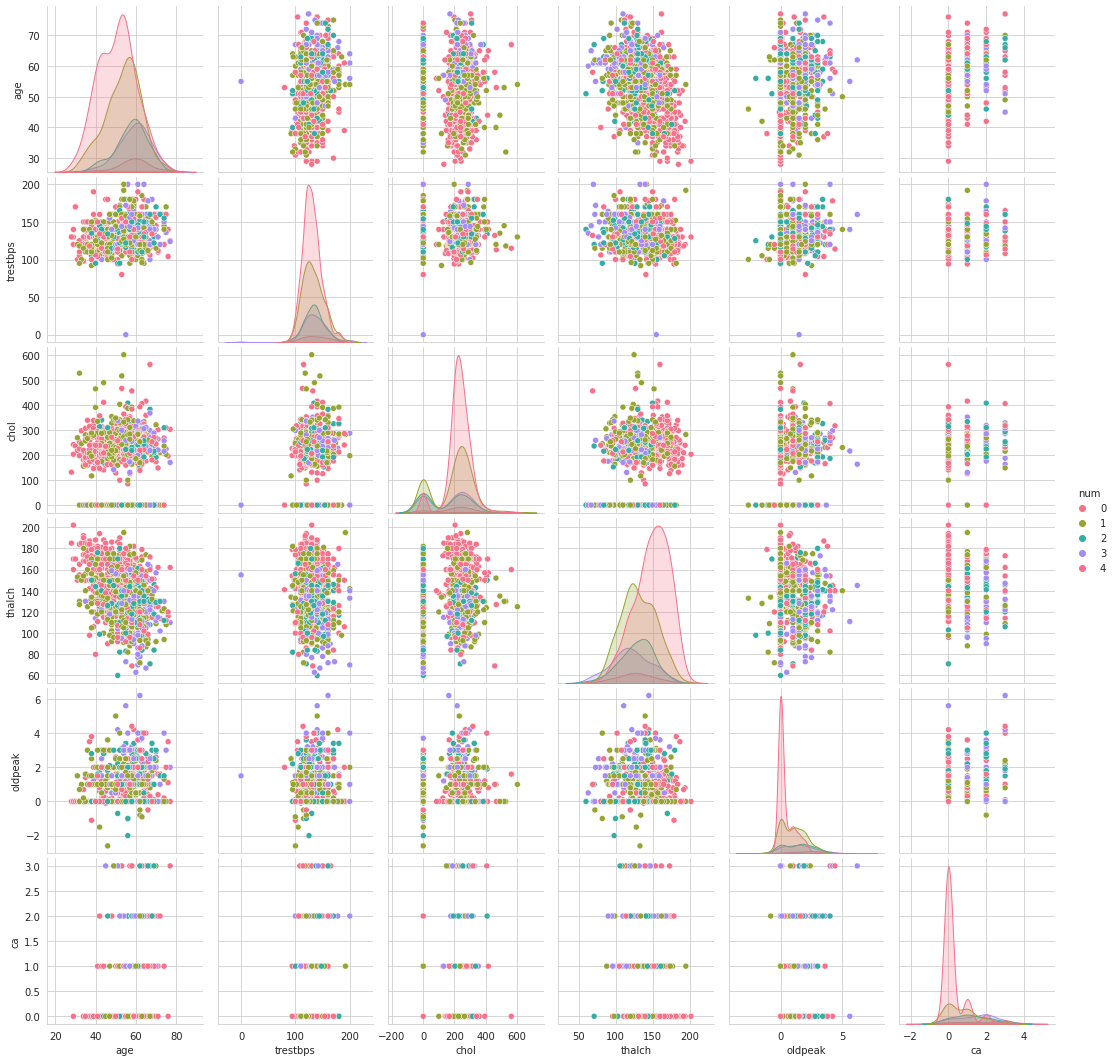

In [ ]:
plt.figure(figsize=(20,30))
sns.pairplot(data, hue = 'num', vars = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], palette="husl" )

**Checking for duplicates**

In [ ]:
data.duplicated().sum()

0

**Checking and fixing null values**

In [ ]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

slope (the slope of the peak exercise ST segment), ca (number of major vessels (0-3) colored by fluoroscopy), and thal (normal; fixed defect; reversible defect) have many null values and dropping sounds ideal. 

In [ ]:
data = data.drop(columns = ['slope', 'thal', 'ca'])

In [ ]:
data.shape

(920, 13)

In [ ]:
# Cholesterol Levels
chol = data.loc[data['chol']!=0, 'chol'].median()
data = data.fillna(value={'chol': chol})

# Resting Blood Pressure
bp = data.loc[data['trestbps']!=0,'trestbps'].mean()
data= data.fillna(value={'trestbps': bp})

# Maximum Heart Rate
hr = data.loc[data['thalch']!=0,'thalch'].mean()
data = data.fillna(value={'thalch': hr})

# Old Peak
peak = data.oldpeak.mean()
data= data.fillna(value={'oldpeak':peak})


In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.drop(columns=['id', 'dataset'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       774 non-null    int64  
 1   sex       774 non-null    object 
 2   cp        774 non-null    object 
 3   trestbps  774 non-null    float64
 4   chol      774 non-null    float64
 5   fbs       774 non-null    object 
 6   restecg   774 non-null    object 
 7   thalch    774 non-null    float64
 8   exang     774 non-null    object 
 9   oldpeak   774 non-null    float64
 10  num       774 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 72.6+ KB


**Checking and fixing outliers in the numerical dataset**

In [ ]:
data_num = data.select_dtypes(include=['float64', 'int64'])

age


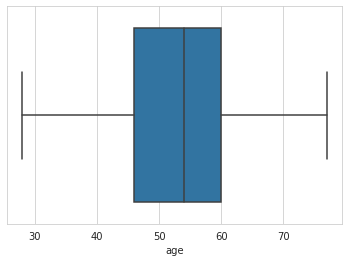

trestbps


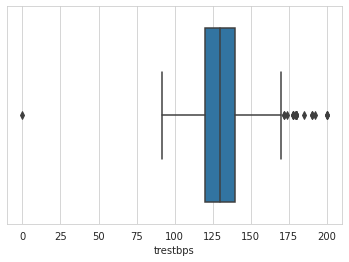

chol


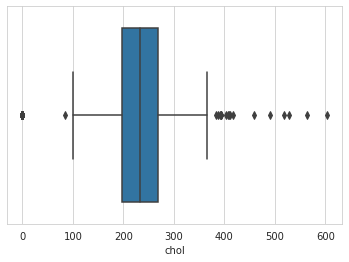

thalch


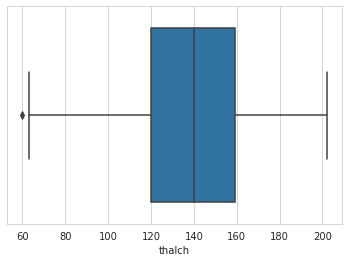

oldpeak


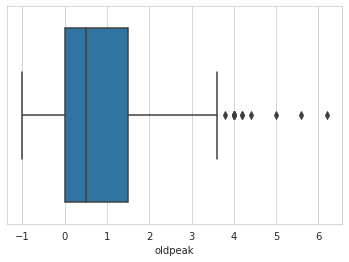

In [ ]:
for i in data_num.iloc[:,:-1].columns:
    sns.boxplot(data[i],data=data_num)
    print(i)
    plt.show()

In [ ]:
data_num.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [ ]:
l=[3,4,9]
def outlier(data):
    for x in data.iloc[:,l].columns :        
        Q1=data[x].quantile(0.25)
        Q3=data[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        data.loc[:,x]= np.where(data[x].values > Upper, Upper-1, data[x].values)
        data.loc[:,x]= np.where(data[x].values < Lower, Lower+1, data[x].values)

outlier(data)

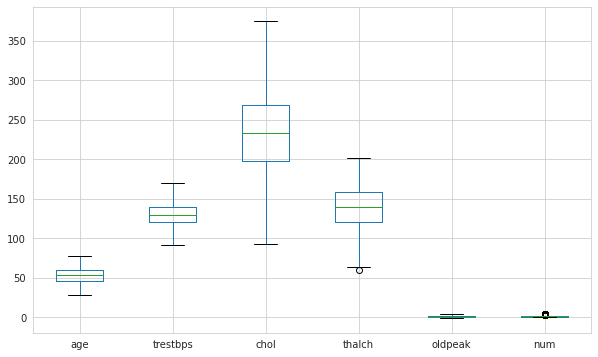

In [ ]:
plt.figure(figsize=(10,6))
#data_num = data_num.drop(columns =['num'])
data.boxplot()
plt.show()

In [ ]:
data_corr = data.corr()
data_corr

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.256505,-0.039394,-0.372539,0.266250,0.366752
trestbps,0.256505,1.000000,0.065248,-0.117186,0.176315,0.163329
chol,-0.039394,0.065248,1.000000,0.164622,0.054860,-0.159133
thalch,-0.372539,-0.117186,0.164622,1.000000,-0.191074,-0.355697
oldpeak,0.266250,0.176315,0.054860,-0.191074,1.000000,0.457771
num,0.366752,0.163329,-0.159133,-0.355697,0.457771,1.000000


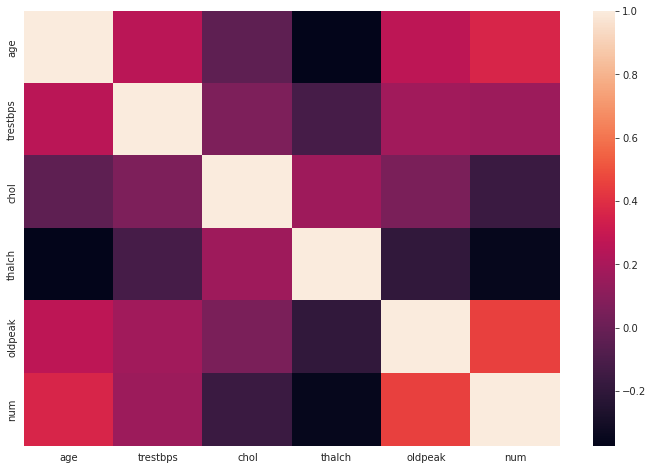

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

**Encoding Categorical Variables**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       774 non-null    int64  
 1   sex       774 non-null    object 
 2   cp        774 non-null    object 
 3   trestbps  774 non-null    float64
 4   chol      774 non-null    float64
 5   fbs       774 non-null    object 
 6   restecg   774 non-null    object 
 7   thalch    774 non-null    float64
 8   exang     774 non-null    object 
 9   oldpeak   774 non-null    float64
 10  num       774 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 72.6+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data['sex'] = encode.fit_transform(data['sex'])
data['cp'] = encode.fit_transform(data['cp'])
data['fbs'] = encode.fit_transform(data['fbs'])
data['restecg'] =encode.fit_transform(data['restecg'])
data['exang'] = encode.fit_transform(data['exang'])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,0


**SPLITTING DATA INTO TRAINING AND TEST SETS**

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)

In [ ]:
X_train = train.drop(['num'], axis = 1)
y_train = train['num']           
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)

Dimension of train_x dataframe: (619, 10)
Dimension of train_y dataframe: (619,)


In [ ]:
X_test = test.drop(['num'], axis = 1)
y_test = test['num']           
print('Dimension of train_x dataframe:',X_test.shape)
print('Dimension of train_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (155, 10)
Dimension of train_y dataframe: (155,)


**SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.36740606,  0.55059776, -0.8587392 , ..., -0.02881335,
        -0.78229097,  1.46755521],
       [-0.53657274,  0.55059776, -0.8587392 , ...,  1.80438206,
        -0.78229097, -0.86031063],
       [-0.95967914, -1.81620789,  1.22580812, ...,  1.38427478,
        -0.78229097, -0.25304128],
       ...,
       [ 0.52119326, -1.81620789,  1.22580812, ...,  1.26970007,
        -0.78229097, -0.86031063],
       [-1.27700894,  0.55059776, -0.8587392 , ...,  0.12395293,
        -0.78229097, -0.86031063],
       [-0.21924294,  0.55059776, -0.8587392 , ..., -3.0077559 ,
        -0.78229097, -0.86031063]])

**MODEL TRAINING and TESTING**

**KNEIGHBORS CLASSIFIER**

K=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5419354838709678
Confusion Matrix:  [[60  7  0  1  0]
 [21 22  2  0  0]
 [ 4  8  2  3  0]
 [ 5 10  3  0  0]
 [ 2  2  0  3  0]]
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        68
           1       0.45      0.49      0.47        45
           2       0.29      0.12      0.17        17
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         7

    accuracy                           0.54       155
   macro avg       0.28      0.30      0.28       155
weighted avg       0.45      0.54      0.48       155



K=5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5483870967741935
Confusion Matrix:  [[59  8  0  1  0]
 [20 22  3  0  0]
 [ 4  7  3  3  0]
 [ 7  7  3  1  0]
 [ 1  2  3  1  0]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        68
           1       0.48      0.49      0.48        45
           2       0.25      0.18      0.21        17
           3       0.17      0.06      0.08        18
           4       0.00      0.00      0.00         7

    accuracy                           0.55       155
   macro avg       0.31      0.32      0.30       155
weighted avg       0.47      0.55      0.50       155



K=7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5612903225806452
Confusion Matrix:  [[60  8  0  0  0]
 [17 25  2  1  0]
 [ 5  8  1  3  0]
 [ 6  8  3  1  0]
 [ 1  3  1  2  0]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        68
           1       0.48      0.56      0.52        45
           2       0.14      0.06      0.08        17
           3       0.14      0.06      0.08        18
           4       0.00      0.00      0.00         7

    accuracy                           0.56       155
   macro avg       0.29      0.31      0.29       155
weighted avg       0.47      0.56      0.50       155



K=9

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5741935483870968
Confusion Matrix:  [[61  7  0  0  0]
 [20 24  0  1  0]
 [ 5  8  3  1  0]
 [ 7  9  1  1  0]
 [ 1  4  1  1  0]]
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        68
           1       0.46      0.53      0.49        45
           2       0.60      0.18      0.27        17
           3       0.25      0.06      0.09        18
           4       0.00      0.00      0.00         7

    accuracy                           0.57       155
   macro avg       0.39      0.33      0.32       155
weighted avg       0.51      0.57      0.51       155



**NAiVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)
y_pred = nvclassifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5225806451612903
Confusion Matrix:  [[58  8  2  0  0]
 [18 16  0  9  2]
 [ 2  6  2  4  3]
 [ 2  7  3  5  1]
 [ 0  2  1  4  0]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        68
           1       0.41      0.36      0.38        45
           2       0.25      0.12      0.16        17
           3       0.23      0.28      0.25        18
           4       0.00      0.00      0.00         7

    accuracy                           0.52       155
   macro avg       0.32      0.32      0.31       155
weighted avg       0.49      0.52      0.50       155



**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
clf= DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.535483870967742
Confusion Matrix:  [[59  5  0  4  0]
 [19 19  0  7  0]
 [ 5  4  0  8  0]
 [ 5  8  0  5  0]
 [ 3  0  0  4  0]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        68
           1       0.53      0.42      0.47        45
           2       0.00      0.00      0.00        17
           3       0.18      0.28      0.22        18
           4       0.00      0.00      0.00         7

    accuracy                           0.54       155
   macro avg       0.27      0.31      0.29       155
weighted avg       0.46      0.54      0.49       155



In [ ]:
# Perform Decision Tree model with class weighting
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.3870967741935484
Confusion Matrix:  [[51  1  6  2  8]
 [ 9  2  8  4 22]
 [ 3  0  2  5  7]
 [ 2  1  5  1  9]
 [ 1  1  1  0  4]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        68
           1       0.40      0.04      0.08        45
           2       0.09      0.12      0.10        17
           3       0.08      0.06      0.07        18
           4       0.08      0.57      0.14         7

    accuracy                           0.39       155
   macro avg       0.29      0.31      0.23       155
weighted avg       0.48      0.39      0.38       155



**BAGGING CLASSIFIER**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5096774193548387
Confusion Matrix:  [[53  9  5  1  0]
 [18 19  4  2  2]
 [ 4  7  4  2  0]
 [ 3 11  1  3  0]
 [ 2  1  2  2  0]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.72        68
           1       0.40      0.42      0.41        45
           2       0.25      0.24      0.24        17
           3       0.30      0.17      0.21        18
           4       0.00      0.00      0.00         7

    accuracy                           0.51       155
   macro avg       0.32      0.32      0.32       155
weighted avg       0.47      0.51      0.49       155



**GRADIENTBOOST CLASSIFIER**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5096774193548387
Confusion Matrix:  [[53  9  5  1  0]
 [18 19  4  2  2]
 [ 4  7  4  2  0]
 [ 3 11  1  3  0]
 [ 2  1  2  2  0]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.72        68
           1       0.40      0.42      0.41        45
           2       0.25      0.24      0.24        17
           3       0.30      0.17      0.21        18
           4       0.00      0.00      0.00         7

    accuracy                           0.51       155
   macro avg       0.32      0.32      0.32       155
weighted avg       0.47      0.51      0.49       155



**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5548387096774193
Confusion Matrix:  [[62  6  0  0  0]
 [19 21  3  2  0]
 [ 6  9  0  2  0]
 [ 3  9  3  3  0]
 [ 2  2  0  3  0]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.78        68
           1       0.45      0.47      0.46        45
           2       0.00      0.00      0.00        17
           3       0.30      0.17      0.21        18
           4       0.00      0.00      0.00         7

    accuracy                           0.55       155
   macro avg       0.28      0.31      0.29       155
weighted avg       0.46      0.55      0.50       155



## **Applying SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample (X_train, y_train)
from collections import Counter
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({0: 309, 1: 166, 2: 64, 3: 63, 4: 17})
After SMOTE:  Counter({0: 309, 1: 309, 2: 309, 3: 309, 4: 309})


**KNEIGHBORS CLASSIFIER**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5032258064516129
Confusion Matrix:  [[50 10  3  5  0]
 [11 20  6  5  3]
 [ 2  5  6  3  1]
 [ 3  8  5  2  0]
 [ 1  0  3  3  0]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        68
           1       0.47      0.44      0.45        45
           2       0.26      0.35      0.30        17
           3       0.11      0.11      0.11        18
           4       0.00      0.00      0.00         7

    accuracy                           0.50       155
   macro avg       0.32      0.33      0.32       155
weighted avg       0.50      0.50      0.50       155



**NAiVE BAYES**

In [ ]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_train_smote, y_train_smote)
y_pred = nvclassifier.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.4838709677419355
Confusion Matrix:  [[54  7  6  0  1]
 [14 12  6  5  8]
 [ 1  3  5  2  6]
 [ 2  4  5  3  4]
 [ 0  2  1  3  1]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        68
           1       0.43      0.27      0.33        45
           2       0.22      0.29      0.25        17
           3       0.23      0.17      0.19        18
           4       0.05      0.14      0.07         7

    accuracy                           0.48       155
   macro avg       0.34      0.33      0.32       155
weighted avg       0.51      0.48      0.49       155



**DECISION TREE CLASSIFIER**

In [ ]:
clf= DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.44516129032258067
Confusion Matrix:  [[56  0 10  0  2]
 [17  0 24  3  1]
 [ 4  0  7  3  3]
 [ 3  0 12  3  0]
 [ 1  0  1  2  3]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        68
           1       0.00      0.00      0.00        45
           2       0.13      0.41      0.20        17
           3       0.27      0.17      0.21        18
           4       0.33      0.43      0.38         7

    accuracy                           0.45       155
   macro avg       0.29      0.37      0.31       155
weighted avg       0.36      0.45      0.39       155



In [ ]:
# Perform Decision Tree model with class weighting
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
clf = clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5419354838709678
Confusion Matrix:  [[56  9  1  1  1]
 [14 21  2  7  1]
 [ 3  6  1  5  2]
 [ 2  7  4  5  0]
 [ 1  0  2  3  1]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        68
           1       0.49      0.47      0.48        45
           2       0.10      0.06      0.07        17
           3       0.24      0.28      0.26        18
           4       0.20      0.14      0.17         7

    accuracy                           0.54       155
   macro avg       0.35      0.35      0.35       155
weighted avg       0.51      0.54      0.53       155



**RANDOM FOREST**

In [ ]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.5870967741935483
Confusion Matrix:  [[58  8  2  0  0]
 [14 22  3  5  1]
 [ 3  4  6  4  0]
 [ 2  6  5  5  0]
 [ 2  0  1  4  0]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        68
           1       0.55      0.49      0.52        45
           2       0.35      0.35      0.35        17
           3       0.28      0.28      0.28        18
           4       0.00      0.00      0.00         7

    accuracy                           0.59       155
   macro avg       0.38      0.39      0.39       155
weighted avg       0.55      0.59      0.57       155



Coclusion: The dataset is very small but the target variable has five categories. Due to this fact, classification methods did not return a good accuracy value. However, dicision tree classifier with hyperparameter tuning results in highest accuracy score. Not only the score is good but it was also possible to obtain positive predictions from all five categories of the target variable.